<a href="https://colab.research.google.com/github/vkvinay0627/Global-Terrorism-Database-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import pandas as pd
import numpy as np
from numpy import *
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
#from wordcloud import WordCloud
from scipy import signal
from matplotlib import *
from pandas import DataFrame
import os
from pandas import DataFrame
from ipywidgets import interact, interactive, fixed, interact_manual 
plt.style.use('fivethirtyeight')
import datetime as dt
import pandas as pd
import os
import matplotlib.pyplot as plt
import ipywidgets
from ipywidgets import interact, IntSlider, interactive, widgets, interact_manual,HBox,fixed
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

In [26]:
df1 = pd.read_csv('/content/drive/MyDrive/Almabetter/Global_Terrorism_Data.csv',encoding='latin1',low_memory=False)

In [27]:
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [28]:
df1.shape

(181691, 135)

In [29]:
# df.columns.to_list()
df1.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [30]:
df = df1.copy()
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [31]:
df = df[["iyear", "imonth", "iday","country", "country_txt", "region_txt", "city","success", 
         "attacktype1_txt","nkill", "propvalue", "targtype1_txt","latitude","gname","longitude",'suicide', "targsubtype1_txt"
         ,"target1","weaptype1_txt", "weapdetail","nwound","extended"]]
df.shape

(181691, 22)

In [32]:
df.rename(columns = {'iyear':'Year', "imonth":"Month","iday":"Day", "country":"Country_no", "suicide":"Suicide",
                     "country_txt":"Country","region_txt":"Region","city":"City", "propvalue":"property_value",
                     "attacktype1_txt":"Attack_type", "targtype1_txt":"Target_type","gname":"group_name",
                     "targsubtype1_txt":"Target_sub_type", "nkill":"no_of_kills","nwound":"Wounded","extended":"Extended",
                     "weaptype1_txt":"Weapon_type", "weapdetail":"Weapon_detail"}, inplace = True)  # Renaming the column values...
df.columns.values

array(['Year', 'Month', 'Day', 'Country_no', 'Country', 'Region', 'City',
       'success', 'Attack_type', 'no_of_kills', 'property_value',
       'Target_type', 'latitude', 'group_name', 'longitude', 'Suicide',
       'Target_sub_type', 'target1', 'Weapon_type', 'Weapon_detail',
       'Wounded', 'Extended'], dtype=object)

In [33]:
df

,Year,Month,Day,Country_no,Country,Region,City,success,Attack_type,no_of_kills,property_value,Target_type,latitude,group_name,longitude,Suicide,Target_sub_type,target1,Weapon_type,Weapon_detail,Wounded,Extended
0,1970,7,2,58,Dominican Republic,Central America & Caribbean,Santo Domingo,1,Assassination,1.0,NaN,Private Citizens & Property,18.456792,MANO-D,-69.951164,0,Named Civilian,Julio Guzman,Unknown,NaN,0.0,0
1,1970,0,0,130,Mexico,North America,Mexico city,1,Hostage Taking (Kidnapping),0.0,NaN,Government (Diplomatic),19.371887,23rd of September Communist League,-99.086624,0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",Unknown,NaN,0.0,0
2,1970,1,0,160,Philippines,Southeast Asia,Unknown,1,Assassination,1.0,NaN,Journalists & Media,15.478598,Unknown,120.599741,0,Radio Journalist/Staff/Facility,Employee,Unknown,NaN,0.0,0
3,1970,1,0,78,Greece,Western Europe,Athens,1,Bombing/Explosion,NaN,NaN,Government (Diplomatic),37.997490,Unknown,23.762728,0,Embassy/Consulate,U.S. Embassy,Explosives,Explosive,NaN,0
4,1970,1,0,101,Japan,East Asia,Fukouka,1,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),33.580412,Unknown,130.396361,0,Embassy/Consulate,U.S. Consulate,Incendiary,Incendiary,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,Armed Assault,1.0,NaN,Military,2.359673,Al-Shabaab,45.385034,0,Military Checkpoint,Checkpoint,Firearms,NaN,2.0,0
181687,2017,12,31,200,Syria,Middle East & North Africa,Jableh,1,Bombing/Explosion,2.0,-99.0,Military,35.407278,Muslim extremists,35.942679,0,Military Barracks/Base/Headquarters/Checkpost,Hmeymim Air Base,Explosives,Mortars were used in the attack.,7.0,0
181688,2017,12,31,160,Philippines,Southeast Asia,Kubentog,1,Facility/Infrastructure Attack,0.0,-99.0,Private Citizens & Property,6.900742,Bangsamoro Islamic Freedom Movement (BIFM),124.437908,0,House/Apartment/Residence,Houses,Incendiary,NaN,0.0,0
181689,2017,12,31,92,India,South Asia,Imphal,0,Bombing/Explosion,0.0,NaN,Government (General),24.798346,Unknown,93.940430,0,Government Building/Facility/Office,Office,Explosives,A thrown grenade was used in the attack.,0.0,0


In [34]:
df.property_value.describe()

count    3.898900e+04
mean     2.088119e+05
std      1.552463e+07
min     -9.900000e+01
25%     -9.900000e+01
50%     -9.900000e+01
75%      1.000000e+03
max      2.700000e+09
Name: property_value, dtype: float64

In [35]:
# displaying the null values of each dataset...
# df['property_value'].describe()
# df['property_value'].isnull().sum()
df['property_value'].isnull().value_counts()

True     142702
False     38989
Name: property_value, dtype: int64

In [36]:
from statistics import *
def impute_nan(df,variable,mean):
    df[variable]=df[variable].fillna(mean)

impute_nan(df,'property_value',mean)
df['property_value'].isnull().sum()

0

In [37]:
df["City"].fillna("Unknown", inplace = True)
df["Target_type"].fillna("Unknown", inplace = True)
df["no_of_kills"].fillna(0, inplace = True)
df["Wounded"].fillna(0, inplace = True)

In [38]:
df.isnull().sum()

Year                   0
Month                  0
Day                    0
Country_no             0
Country                0
Region                 0
City                   0
success                0
Attack_type            0
no_of_kills            0
property_value         0
Target_type            0
latitude            4556
group_name             0
longitude           4557
Suicide                0
Target_sub_type    10373
target1              636
Weapon_type            0
Weapon_detail      67670
Wounded                0
Extended               0
dtype: int64

In [39]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Maximum people killed in an attack:',df['no_of_kills'].max())
print("Year with the most attacks:",df['Year'].value_counts().idxmax()) #index[0]
print("Year with the least attacks:",df['Year'].value_counts().idxmin()) #index[-1]
print("Most Attack Types:",df['Attack_type'].value_counts().idxmax())
print("Most Active Group:",df['group_name'].value_counts().index[1])

Country with Highest Terrorist Attacks: Iraq
Maximum people killed in an attack: 1570.0
Year with the most attacks: 2014
Year with the least attacks: 1971
Most Attack Types: Bombing/Explosion
Most Active Group: Taliban


In [40]:
# Which Region had the most terrorism attacks??
print('The region of',df['Region'].value_counts(dropna=True, normalize=False, ascending=False).index[0] ,
      'had the highest amount of Terrorist Attacks totalled at',
      df['Region'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

# Name of the city, village, or town in which the incident occurred
print(df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[0] ,
      'and Unnamed Cities consisting of Terrorist Attacks totalled at',
      df['City'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')
print('The most known city that had terror attacks was' ,
      df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[1])
print(' ')

#Most notably used weapon
print('The most used weapon in terror attacks was' ,df['Weapon_type']
      .value_counts(dropna=True, normalize=False, ascending=False).index[0],'totalled at',
      df['Weapon_type'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

#most known country
print('The most known country with terror attacks was' ,df['Country']
      .value_counts(dropna=True, normalize=False, ascending=False).index[0],
      'totalled at',df['Country'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')

#1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
s = df['Suicide'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
print('Out of',df['Suicide'].value_counts(dropna=True, normalize=False, ascending=False).sum(),
      'total attacks',s[1],'were suicide attacks')
print(' ')
print('The most preferred method of attack was',df['Attack_type']
      .value_counts(dropna=True, normalize=False, ascending=False).index[0],
      'totalling at',df['Attack_type'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')
t = df['Target_type'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

print('The main targets of terrorists were',df['Target_type'].value_counts(dropna=True, normalize=False, ascending=False)
      .index[0],'totalling at',t[0],', while the second was',df['Target_type'].
      value_counts(dropna=True, normalize=False, ascending=False).index[1],'at',t[1])

The region of Middle East & North Africa had the highest amount of Terrorist Attacks totalled at 50474
 
Unknown and Unnamed Cities consisting of Terrorist Attacks totalled at 10209
 
The most known city that had terror attacks was Baghdad
 
The most used weapon in terror attacks was Explosives totalled at 92426
 
The most known country with terror attacks was Iraq totalled at 24636
 
Out of 181691 total attacks 3.7% were suicide attacks
 
The most preferred method of attack was Bombing/Explosion totalling at 88255
 
The main targets of terrorists were Private Citizens & Property totalling at 23.9% , while the second was Military at 15.4%


In [41]:
df['Day'] = np.where(df.Day == 0,1,df.Day)
df['Month'] = np.where(df.Month == 0,1,df.Month)
df['date'] = df.Year.astype(str)+'-'+df.Month.astype(str).str.zfill(2)+'-'+df.Day.astype(str).str.zfill(2)
df.date = pd.to_datetime(df.date)
df.date.head

<bound method NDFrame.head of 0        1970-07-02
1        1970-01-01
2        1970-01-01
3        1970-01-01
4        1970-01-01
            ...    
181686   2017-12-31
181687   2017-12-31
181688   2017-12-31
181689   2017-12-31
181690   2017-12-31
Name: date, Length: 181691, dtype: datetime64[ns]>

# <b>1. Year-wise trend on world</b>

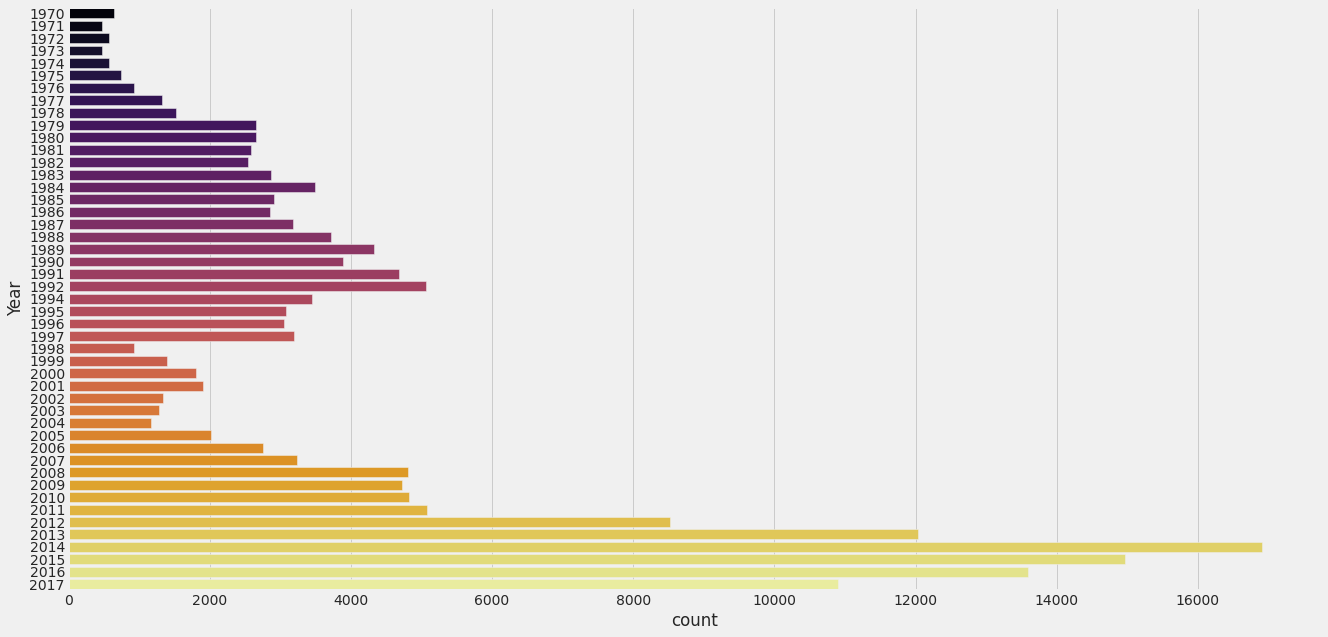

In [42]:
# 1.1 In which year, attacks happened most number of times

plt.rcParams['figure.figsize'] = 20,10
sns.countplot(y=df['Year'], palette='inferno')
plt.show()

# Result = minimum attacks between 1997 and 2004 && maximum attacks in year 2014

Result = minimum attacks between 1997 and 2004 and maximum attacks in year 2014

   Year  no_of_kills
0  2014      44490.0
1  2015      38853.0
2  2016      34871.0
3  2017      26445.0
4  2013      22273.0


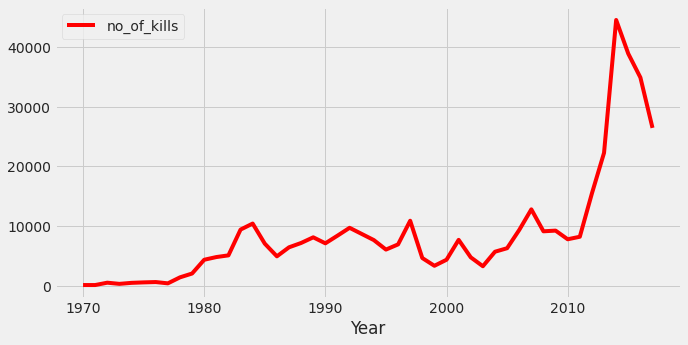

In [43]:
# 1.2 In which year, Highest number of kills are there.
  
Kills_year = df[['no_of_kills','Year']]
Kills_year2 = Kills_year.groupby(['Year']).sum().sort_values('no_of_kills',ascending=False).reset_index().head(5)
print(Kills_year2)
plt.rcParams['figure.figsize'] = 10,5
Kills_by_year = df[["Year","no_of_kills"]].groupby("Year").aggregate(np.sum)
Kills_by_year.plot(color = 'r');

#Results = maximum kills in 2014 and downward trend since then

Results = maximum kills in 2014 and downward trend since then

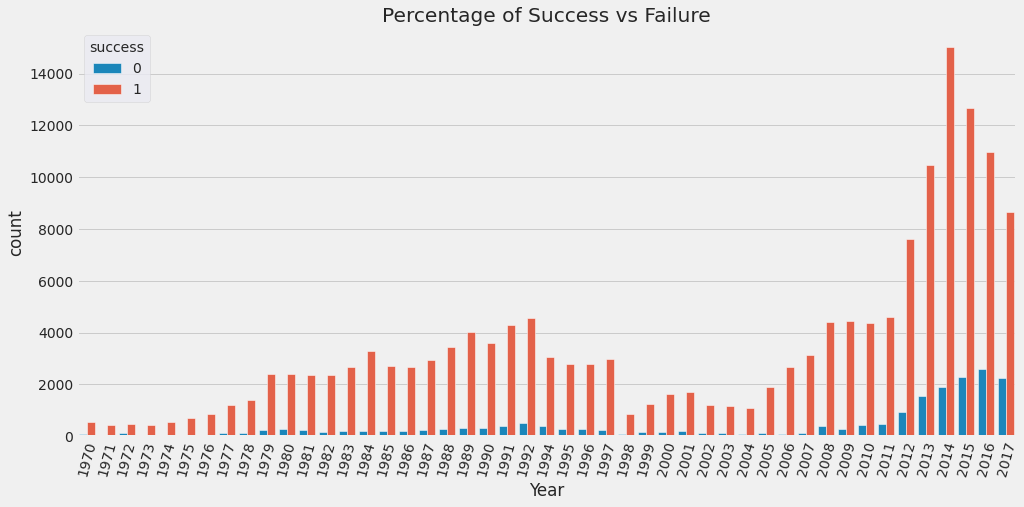

In [44]:
plt.figure(figsize=(15,7))   
plt.title("Percentage of Success vs Failure") # printing the title
plt.xticks(rotation=75)
sns.set_style('darkgrid')  # Making background in a stylish format
sns.countplot(x ='Year', hue = "success", data = df)  #using countplot with year and success
plt.show() # showing the plot...

In [45]:
layout = widgets.Layout(width='auto', height='40px')
start_dater = widgets.DatePicker(description='Pick a Start Date',disabled=False )
end_dater = widgets.DatePicker(description='Pick an End Date',disabled=False )

# display(start_dater)
# display(end_dater)